In [1]:
import pandas as pd
import pyforest
import numpy as np 
import seaborn as sns 
import matplotlib.pylab as plt 


In [2]:
df=pd.read_csv('car data.csv')

In [3]:
df.head(-1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Mannual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Mannual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Mannual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Mannual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Mannual,0
...,...,...,...,...,...,...,...,...,...
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Mannual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Mannual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Mannual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Mannual,0


In [4]:
df.shape

(301, 9)

In [5]:
print(df["Seller_Type"].unique(), df["Transmission"].unique(), df["Owner"].unique(),df["Fuel_Type"].unique())

['Dealer' 'Individual'] ['Mannual' 'Automatic'] [0 1 3] ['Petrol' 'Diesel' 'CNG']


In [6]:
df.isnull()
df.isnull().sum() #no null values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
fdf=df[["Year","Selling_Price","Present_Price","Kms_Driven","Fuel_Type","Seller_Type","Transmission","Owner"]]

In [9]:
fdf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Mannual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Mannual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Mannual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Mannual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Mannual,0


In [10]:
fdf["Current_Year"]=2021

In [11]:
fdf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Mannual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Mannual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Mannual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Mannual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Mannual,0,2021


In [12]:
fdf["Total_Years"]=fdf["Current_Year"]-fdf["Year"]

In [13]:
fdf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Total_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Mannual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Mannual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Mannual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Mannual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Mannual,0,2021,7


In [14]:
fdf.drop(["Year","Current_Year"],axis=1, inplace=True)

In [15]:
fdf=pd.get_dummies(fdf,drop_first=True) # three columns with categorial data namely Fuel_type,Seller type,Transmission
fdf.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Total_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [16]:
fdf.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Total_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Total_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [17]:
fdf.columns


Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Total_Years',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

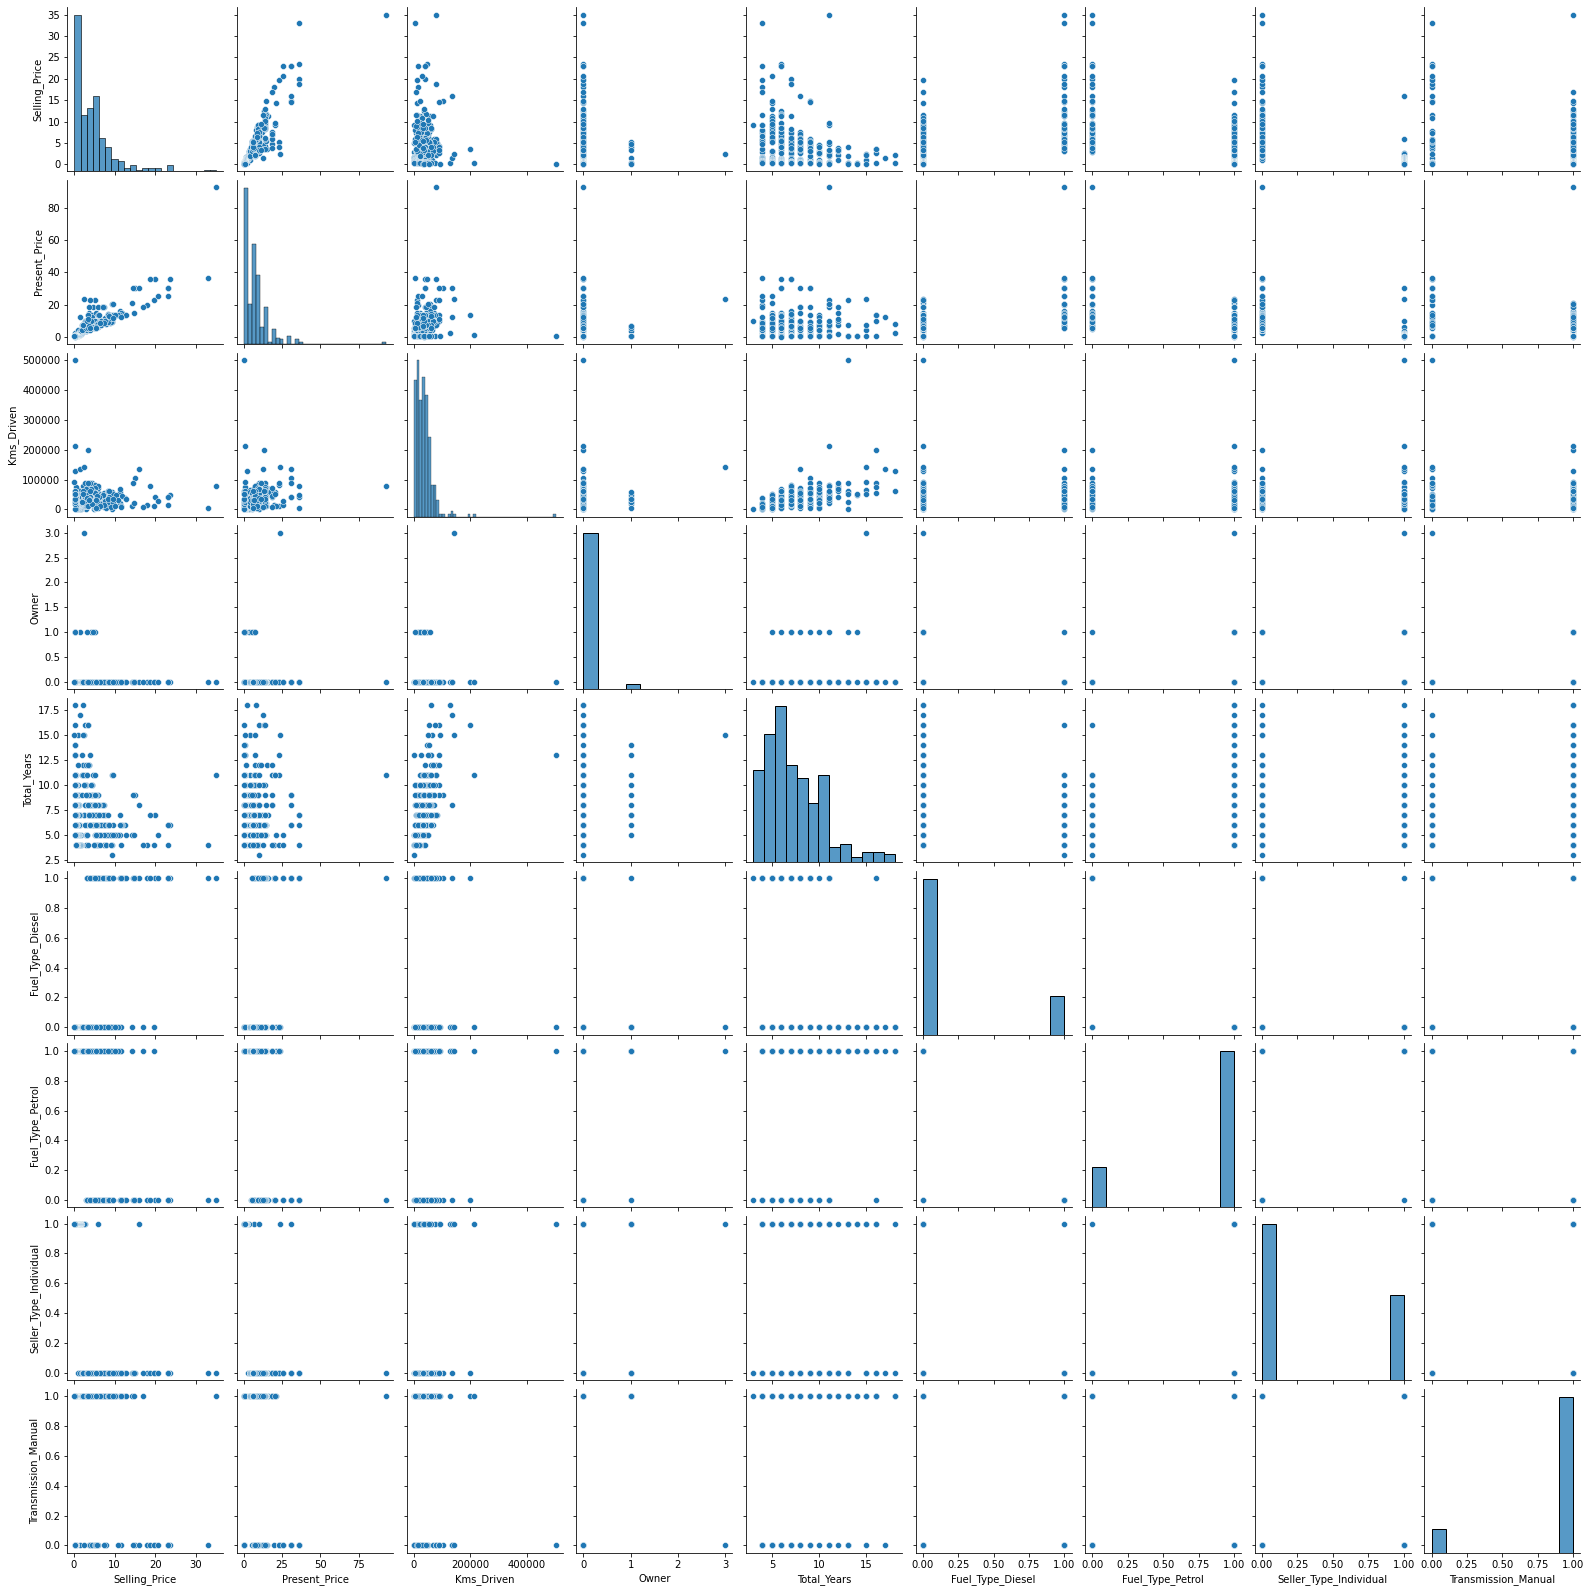

In [18]:
sns.pairplot(fdf)

<AxesSubplot:>

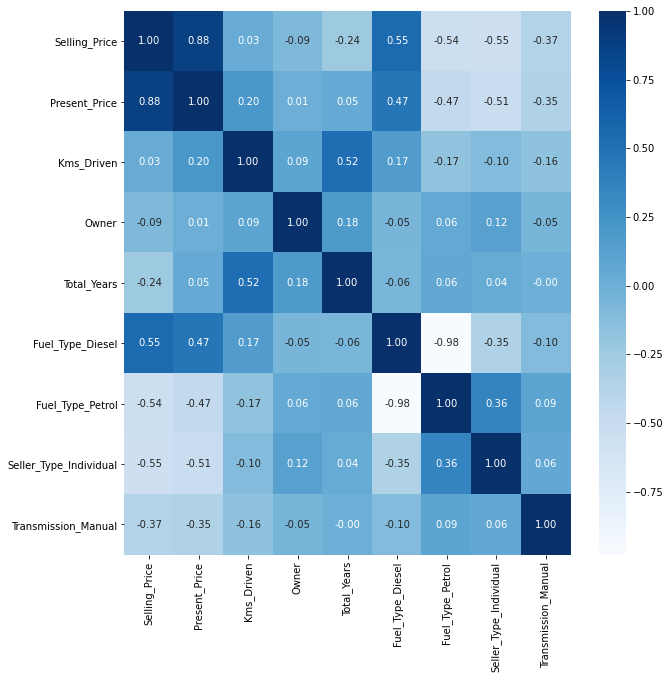

In [19]:
corrmat=fdf.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10)) #plot heatmap
sns.heatmap(fdf[top_corr_features].corr(), annot=True, fmt=".2f", cmap='Blues')


In [20]:
fdf.head() #selling price is dependent feature

,Selling_Price,Present_Price,Kms_Driven,Owner,Total_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [21]:
X=fdf.iloc[:,1:]
Y=fdf.iloc[:,0]
X.head()

,Present_Price,Kms_Driven,Owner,Total_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [22]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [23]:
#feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [24]:
print(model.feature_importances_) #we can check with index values for the impotant feature

[0.34214239 0.04205957 0.00036884 0.07622393 0.25544434 0.00703215
 0.13036702 0.14636176]


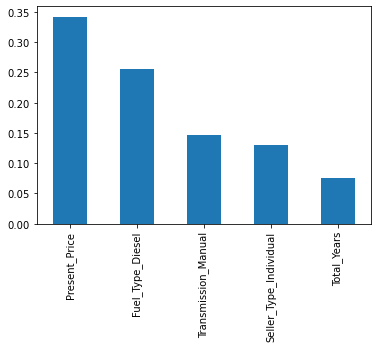

In [25]:
#To visualize the most important feature
feature_importance=pd.Series(model.feature_importances_ , index=X.columns)
feature_importance.nlargest().plot(kind="bar")
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25)

In [27]:
X_train.shape

(225, 8)

In [28]:
Y_train.shape


(225,)

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [30]:
#hyperparameters 
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)] 
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)] 
max_features=["auto",'sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)] 
min_samples_split=[2,5,15,20,100]
min_samples_leaf=[2,5,10,20]

In [33]:
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 15, 20, 100], 'min_samples_leaf': [2, 5, 10, 20]}


In [34]:
rf=RandomForestRegressor()

In [35]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=45,n_jobs=1)

In [36]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=1200, min_samples_split=20, min_samples_leaf=20, max_features=auto, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=20, min_samples_leaf=20, max_features=auto, max_depth=20, total=   1.1s
[CV] n_estimators=1200, min_samples_split=20, 

[CV]  n_estimators=200, min_samples_split=20, min_samples_leaf=5, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=20, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=20, min_samples_leaf=5, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=20, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=20, min_samples_leaf=5, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=20, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=20, min_samples_leaf=5, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=300, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=300, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=300, min_samples_split=20

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   27.1s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 10, 20],
                                        'min_samples_split': [2, 5, 15, 20,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=45, scoring='neg_mean_squared_error',
                   verbose=2)

In [37]:
#rf.get_params().keys()

In [38]:
predict=rf_random.predict(X_test)

In [39]:
predict

array([ 0.453518  ,  0.31649955,  2.86460403,  0.46594588,  0.47146406,
        7.25042288,  1.1000145 ,  2.78695361,  1.47433435,  2.51453358,
        1.21454176,  7.24330168,  4.88617152,  2.76828562,  6.72744202,
        3.02856305,  0.57644508,  1.10393722,  5.83540881,  4.63264569,
       10.2551797 ,  0.42180286,  0.41815439,  3.46274045,  9.6978897 ,
        0.58265   ,  4.92056644,  0.58512887,  5.23503991,  9.61645999,
        0.43164362,  0.61583537,  4.8953322 ,  0.3357661 ,  5.23515744,
        4.74869508,  3.90723275,  4.13110342,  1.1670735 ,  3.02856305,
        5.70399098,  6.73793051,  0.53372666,  1.88514775,  0.46594588,
       19.99298175,  0.4647177 ,  0.47457486,  0.53769995,  1.07426575,
        5.83540881,  0.46594588,  1.48032303,  0.58189952,  3.09756991,
       19.99298175,  4.89943841,  7.3742179 ,  5.07205312,  7.13552574,
        0.4320177 ,  0.46546163,  0.42665496, 10.82492013,  1.0984203 ,
        0.42739889,  5.60109854,  5.08135862,  0.46594588,  9.94

<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

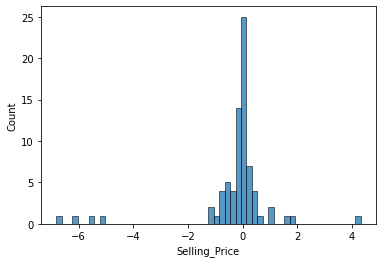

In [44]:
sns.histplot(Y_test-predict)

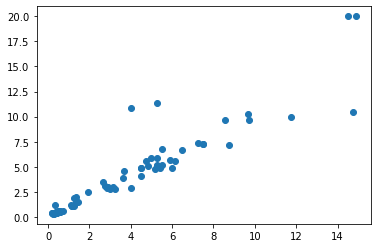

In [45]:
plt.scatter(Y_test,predict)

In [46]:
import pickle
file=open('random_forest-r_model.pkl','wb')
pickle.dump(rf_random,file) #dump